# Intro

* Loading Data

In [ ]:
# Loading libraries

import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("products.csv")
print("the dataset has " + str(df.shape[0]) + " observations (ice cream flavors) and " + str(df.shape[1]) + " features " + str([col for col in df.columns]))

# Dataset: https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset

# Inspirations
# Using Ice Cream Ingredients to Predict Rating: https://www.kaggle.com/code/gcdatkin/using-ice-cream-ingredients-to-predict-rating
# Finding the Best Ice Cream: https://www.kaggle.com/code/kelvintran1998/finding-the-best-ice-cream
# EDA ideas: McDonalds Ice Cream Machines Breaking: https://www.kaggle.com/code/aashidutt3/eda-mcdonalds-ice-cream-machines-breaking

In [ ]:
df.head(10)

* Data Cleaning: dropping unused columns

In [ ]:
# we don't need to use these columns, so we will drop it
df = df.drop(columns=['key','subhead','description'])

* Data Cleaning: transform brand feature to more readable names

In [ ]:
# change brand name
df['brand'] = df['brand'].replace(['hd','breyers','bj','talenti'],['HaagenDazs','Breyers','BenJerrys','Talenti'])
df['brand'].value_counts()

# Exploratory Data Analysis

* Exploratory Data Analysis: Color Scheme

In [19]:
# loading dataviz libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

sns.set_theme(style="whitegrid")
sns.despine(left=True, bottom=True)

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Color Scheme
class clr:
    S = '\033[1m' + '\033[96m' # chance color text
    E = '\033[0m'
    
my_colors = ['#1F6082', '#6A2340', '#83563f', '#495057']

sns.palplot(sns.color_palette(my_colors))

print(clr.S + "Notebook Color Scheme: " + clr.E)
print(r"Ben Jerry's, Häagen-Dazs, Talenti, Breyers")


In [ ]:
# create color reference dict
# the idea is to use this dict to sort the color code in the same way of the plot
# colors = ['#1F6082', '#6A2340', '#83563f', '#171717']

color_reference = {'BenJerrys':'#1F6082', 'Breyers':'#495057', 'HaagenDazs':'#6A2340', 'Talenti':'#83563f'}
color_reference

In [ ]:
sns.set()
plt.style.use('seaborn-v0_8-notebook')
%matplotlib inline
rcParams['figure.figsize'] = 12,8
rcParams['figure.titlesize'] = 14
rcParams['font.size'] = 15

* Exploratory Data Analysis

In [14]:
# change column names
flavors = df['brand'].value_counts().reset_index().sort_values('brand', ascending=False)
flavors = flavors.rename(columns = {'index':'brand', 'brand':'value_counts'})
flavors

,brand,value_counts
0,HaagenDazs,70
1,Breyers,69
2,BenJerrys,57
3,Talenti,45


Text(0, 0.5, '# Flavors')

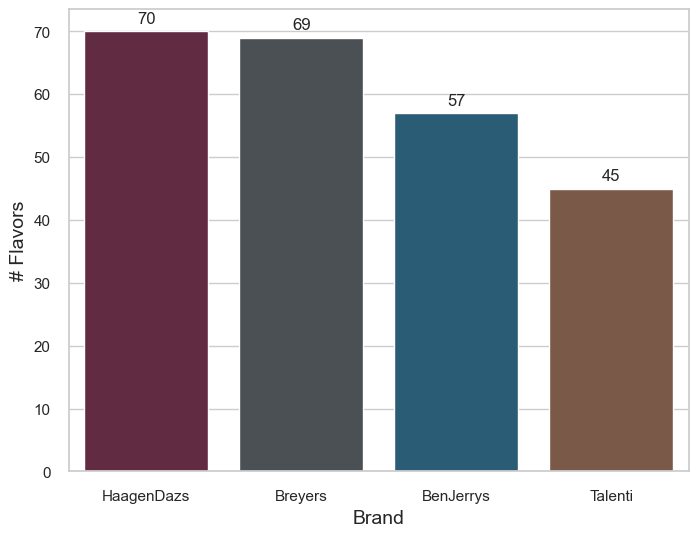

In [20]:
# plot the brands flavors counts

plt.figure(figsize=(8, 6))
colors = flavors['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=flavors, x='brand', y='value_counts', palette=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('# Flavors', fontsize=14)


* Exploratory Data Analysis: Flavors vs Rating

Text(0, 0.5, 'Flavors')

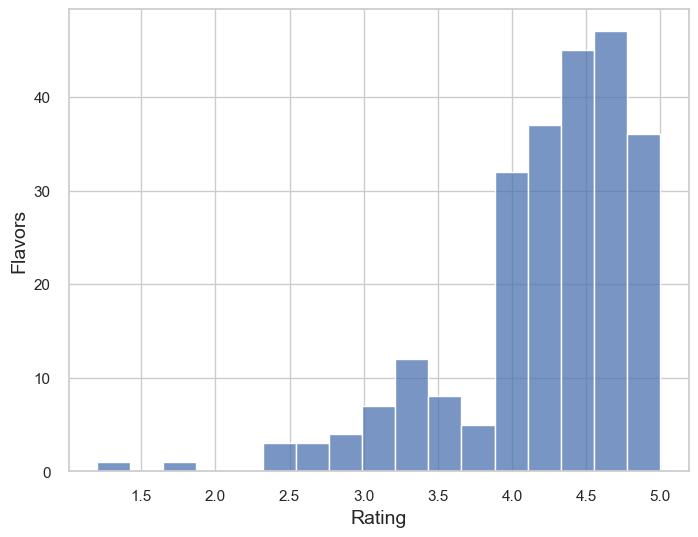

In [21]:
# Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Flavors', fontsize=14)

In [22]:
# change column names
ratings_by_brand = df.groupby('brand')['rating_count'].sum().reset_index().sort_values('brand', ascending=True)
ratings_by_brand

,brand,rating_count
0,BenJerrys,7954
1,Breyers,5009
2,HaagenDazs,4657
3,Talenti,4074


Text(0, 0.5, '# Reviews')

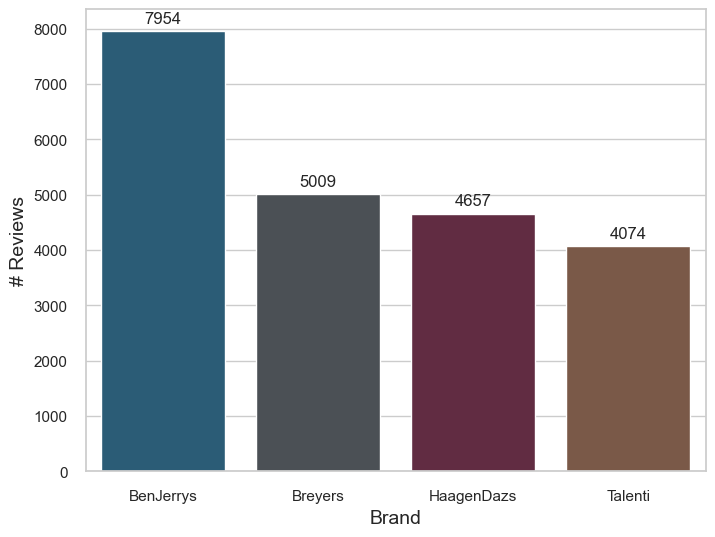

In [23]:
# plot the brands flavors counts

plt.figure(figsize=(8, 6))
colors = ratings_by_brand['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=ratings_by_brand, x='brand', y='rating_count', palette=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Brand', size=14)
plt.ylabel('# Reviews', size=14)

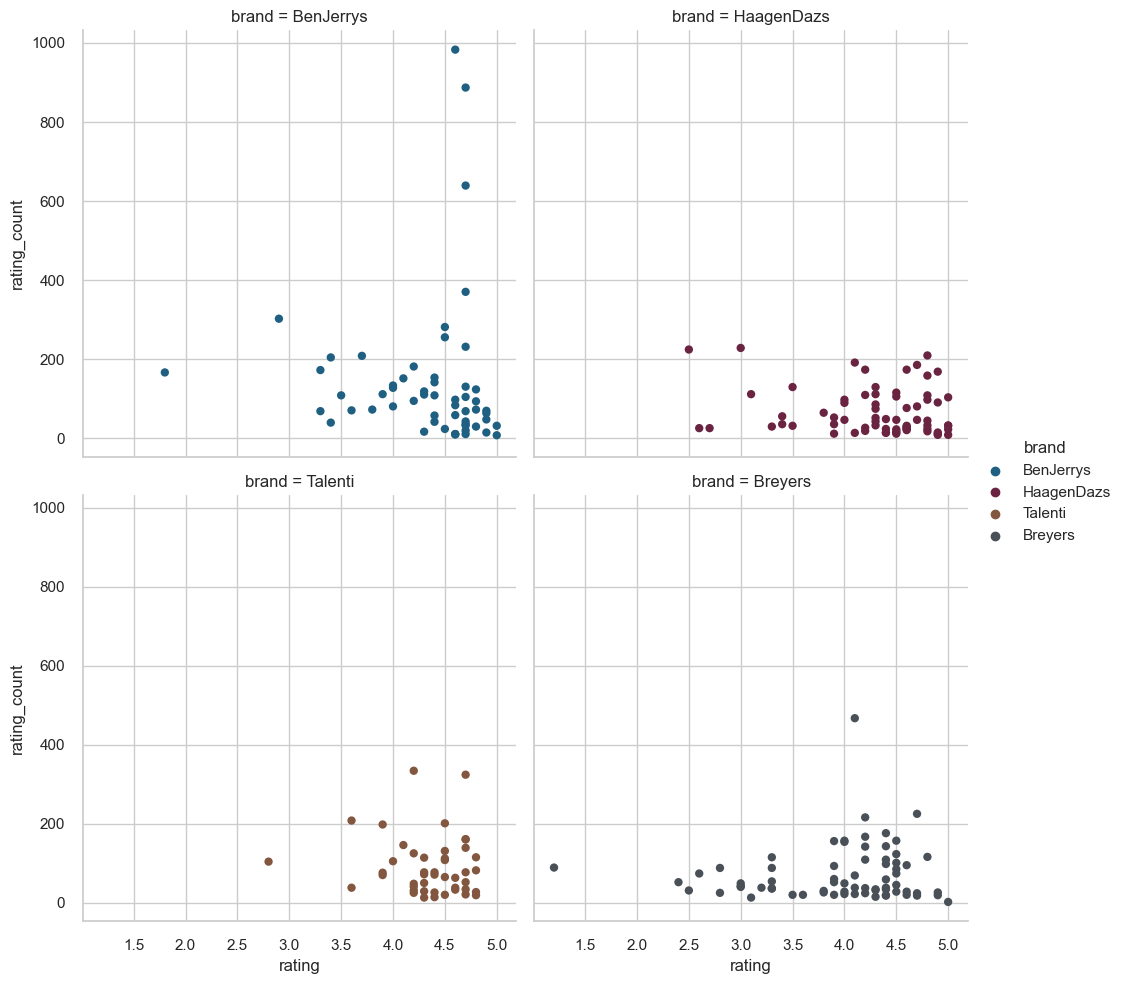

In [24]:
# scatter plot by brand
sns.relplot(data=df,
                x='rating', y='rating_count',
                hue='brand',
                col='brand',
                palette=my_colors,
                sizes=(1, 6), linewidth=0, col_wrap=2
                )

In [ ]:
# scatter plot by brand
_, axs = plt.subplots(nrows=1, ncols=2) # making a subplot with 1 row and 2 columns
sns.stripplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[0])
sns.boxplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[1])

In [ ]:
# Data Summary and Comments

"""



"""


In [ ]:
df.query('rating < 2.5')

* Top Ice Cream for each brand

In [ ]:
# Top 10 Ben & Jerry's Ice Cream
top10_bj = df[df['brand'] == 'BenJerrys'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_bj

In [ ]:
# Top 10 Haagen Dazs Ice Cream
top10_hd = df[df['brand'] == 'HaagenDazs'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_hd

In [ ]:
# Top 10 Talenti Ice Cream

In [ ]:
# Top 10 Breyers Ice Cream 

# Getting Unique List of All Ingredients

* Data Cleaning

In [ ]:
# increasing column character limit for better visualization
pd.set_option('display.max_colwidth', 50000)

In [ ]:
# eliminating content inside parentheses ()
df['ingredients_cleaned'] = df['ingredients'].str.lower()
df['ingredients_cleaned'].head()

In [ ]:
# generate all unique ingredients
all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients_cleaned']
    for ingredient in ingredients.split(','):
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

# iterrows(): returns a tuple containing the index and the rest of the row

In [ ]:
all_ingredients

# we can se all the problems with the description ingredients (that subingredients of an ingredient)

# 1) parentheses capture all the content inside parentheses
# 2) AND and OR
# 3) special character

# PorterStemmer()
# stem function()
# takes all words and break them down to their root. This reduces significantly duplicated words (ex: egg x eggs)

In [ ]:
# importing regex module
import re

In [ ]:
# eliminating content inside parentheses '()'
df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(r'\([^()]*\)',"", regex=True)
df['ingredients_cleaned'].head() # checking

In [ ]:
# this function for spliting text: corrects and process text
def ingredients_processing(text):
    bool = df['ingredients_cleaned'].str.contains(text, regex=False)
    val_to_replace = df['ingredients_cleaned'][bool].str.split(text).str[0]
    df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)
    return

In [ ]:
# problematic text: spliting by and selecting only first column

problematic_text_ingredients_list = ['\ncontains', 'contains', '.']

for text in problematic_text_ingredients_list:
    ingredients_processing(text)

In [ ]:
#checking results

df['ingredients_cleaned']

In [ ]:
# Observations with ':' 
# These observations strongly indicates that ice cream have additional items (coating, caramel/fudge, chocolate chips, chocolate drizzle, peanut butter, etc)

# 1) First, I'm going to create a column that checks for existing additional items. Then, if necessary, I will manually make corrections.
# 2) Secondl, because the first ':' indicates the first item (ice cream) ingredients, i'll split that row and select second column ("ice cream: milk, ...")

In [ ]:
# checking ice creams flavors that have additional items
bool = df['ingredients_cleaned'].str.contains(":", regex=False)
df['have_additional_items'] = bool

In [ ]:
# checking inconsistencies

df[df['have_additional_items']== True]

In [ ]:
# manual correction
# only row 157 (Talenti Organic Oak-Aged Vanilla Gelato) needs correction

df.loc[157, 'have_additional_items'] = False

In [ ]:
# observations with ':' problem - spliting by and selecting only second column

bool = df['ingredients_cleaned'].str.contains(":", regex=False)
val_to_replace = df['ingredients_cleaned'][bool].str.split(": ").str[1] # here we will use the second column, not the first
df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)

In [ ]:
df['ingredients_cleaned']

* Data Treatment: Manual Correction

In [ ]:
# tests
#df[df['ingredients_cleaned'].str.contains("mono and diglycerides", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains(" and ", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("and/or", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("†", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("*", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains(")", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("/", regex=False)] == True
df[df['ingredients_cleaned'].str.contains("vanilla ice cream", regex=False) == True]

#81 have_add

In [ ]:
# treating the problem with 'mono and diglycerides'

df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace("mono and diglycerides", "monoglycerides, diglycerides", regex=False)

In [ ]:
# treating the problem with 'and/or' + 'and':
unwanted_text = [' and ', 'and/or']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ',', regex=False)

In [ ]:
# replacing strange text to ''

unwanted_text = ['†', ')' , 'organic', 'pasteurized','(sugar', 'unbleached', 'enriched', 'unenriched', 'vanilla ice cream', 'coffee ice cream', 'white chocolate ice cream', 
'unsweetened', 'whole', 'pieces', 'concentrates', 'concentrate', 'juice', 'pasteurized', 'puree',  'vegetable s', ' lake']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, '', regex=False)

In [ ]:
# replacing strange text to ' '

unwanted_text = ['*', '/']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ' ', regex=False)

In [ ]:
# Word Correcting

# Ok. I'm feeling very dumb for doing this checking mannually. 
# I could use PorterStemmer, which is based on suffixes in the English language. But after some tests, i'm not feeling very confident to use that

# Creating a dictionary
word_correcting = {"reese's mini ": "reese's peanut butter", "reese's peanut butter cup ": "reese's peanut butter", "reese's peanut butter cups": "reese's peanut butter", "reese's peanut butter sauce": "reese's peanut butter", "reese's peanut butter swirl": "reese's peanut butter", 'almonds roasted in vegetable oil': 'almonds', 'roasted almonds': 'almonds', 'dried apples': 'apple', 'apples': 'apple', 'artificial color lake': 'artificial color', 'color added': 'artificial color', 'annatto': 'artificial color', 'blue 1': 'artificial color', 'blue 1': 'artificial color', 'blue 1 lake': 'artificial color', 'blue 2': 'artificial color', 'blue 2 lake': 'artificial color', 'yellow 5': 'artificial color', 'yellow 5 lake': 'artificial color', 'yellow 6': 'artificial color', 'yellow 6 lake': 'artificial color', 'red 40': 'artificial color', 'red 40 lake': 'artificial color', 'reb a': 'artificial color', 'artificial color lake': 'artificial color', 'artificial flavoring': 'artificial flavor', 'artificial flavors': 'artificial flavor', 'banana puree': 'banana', 'bananas': 'banana', 'black carrot s': 'black carrot', 'black raspberry puree': 'black raspberry', 'black raspberries': 'black raspberry', 'blueberries': 'blueberry', 'butteroil': 'butter', 'butterfat': 'butter', 'butter oil': 'butter', 'dried cane syrup': 'cane syrup', 'caramelized sugar': 'caramel', 'caramel color': 'caramel', 'caramel flavor': 'caramel', 'caramel swirl': 'caramel', 'caramel syrup': 'caramel', 'caramelized sugar syrup': 'caramelized sugar', 'carob bean': 'carob bean gum', 'carob gum': 'carob bean gum', 'cheese culture': 'cheese cultures', 'cherries': 'cherry', 'cherry': 'cherry', 'cherry puree': 'cherry', 'cherry concentrate': 'cherry', 'cherry juice concentrate': 'cherry', 'chocolate chip cookies': 'chocolate', 'chocolate chips': 'chocolate', 'chocolate cookie pieces': 'chocolate', 'chocolate flavored coating': 'chocolate', 'chocolate liquor': 'chocolate', 'chocolate processed with alkali': 'chocolate', 'chocolatey chips': 'chocolate', 'milk chocolate candies': 'chocolate', 'milk chocolate': 'chocolate', 'dark chocolate': 'chocolate', 'semi-sweet chocolate chunks': 'chocolate', 'chocolaty coated cone': 'chocolatey coated cone', 'black cocoa processed with alkali': 'cocoa processed with alkali', 'coconut concentrate': 'coconut', 'coconut cream': 'coconut', 'coconut extract': 'coconut', 'desiccated coconut': 'coconut', 'coffee extract': 'coffee', 'coffee extract concentrate': 'coffee', 'condensed skim milk': 'condensed milk', 'evaporated milk': 'condensed milk', 'sweetened condensed milk': 'condensed milk', 'sweetened condensed skim milk': 'condensed milk', 'corn syrup solids': 'corn syrup', 'high fructose corn syrup': 'corn syrup', 'corn starch': 'cornstarch', 'modified corn starch': 'cornstarch', 'modified cornstarch': 'cornstarch', 'modified food starch': 'cornstarch', 'modified cornstarch': 'cornstarch', 'eggs': 'egg', 'whole egg': 'egg', 'whole eggs': 'egg', 'egg whites': 'egg white', 'egg yolks': 'egg yolk', 'guar': 'guar gum', 'ground heath toffee': 'heath toffee bar', 'hibiscus flower': 'hibiscus', 'hibiscus powder': 'hibiscus', 'invert cane sugar': 'inverted sugar syrup', 'invert sugar': 'inverted sugar syrup', 'lactase enzyme': 'lactase', 'lemon juice': 'lemon', 'lemon juice concentrate': 'lemon', 'locust bean': 'locust bean gum', 'dry malt extract': 'malt extract', 'maltitol': 'maltitol syrup', 'corn maltodextrin': 'maltodextrin', 'mango puree': 'mango', 'mangos': 'mango', 'organic milk': 'milk', 'anhydrous milkfat': 'milk fat', 'milkfat': 'milk fat', 'nonfat milk solids': 'milk powder', 'nonfat dry milk': 'milk powder', 'whole milk powder': 'milk powder', 'skim milk powder': 'milk powder', 'natural flavors': 'natural flavor', 'rolled oats': 'oats', 'vitamin a palm oil oilitate': 'palm oil', '^palm$': 'palm oil', 'palm kernel': 'palm oil', 'palm kernel oil': 'palm oil', 'partially defatted peanut flour': 'peanut', 'roasted peanuts': 'peanuts', 'peppermint bark': 'peppermint', 'peppermint extract': 'peppermint', 'peppermint oil': 'peppermint', 'peppermint twists candy': 'peppermint', 'pistachio paste': 'pistachio', 'pistachios': 'pistachio', 'raspberries': 'raspberry', 'raspberry swirl': 'raspberry', 'sea salt': 'salt', 'organic skim milk': 'skim milk', 'lactose reduced skim milk': 'skim milk', 'nonfat milk': 'skim milk', 'soy lecithin': 'soybean lecithin', 'soybean lecithin natural flavor': 'soybean lecithin', 'soy lecithin natural flavor': 'soybean lecithin', 'soybean oils': 'soybean oil', 'expeller pressed soybean oil': 'soybean oil', 'spice': 'spices', 'strawberries': 'strawberry', 'strawberry swirl': 'strawberry', 'powdered sugar': 'sugar', 'cane sugar': 'sugar', 'liquid sugar': 'sugar syrup', 'sunflower oils': 'sunflower oil', 'tapioca flour': 'tapioca', 'tapioca starch': 'tapioca', 'tapioca syrup': 'tapioca', 'tara': 'tara gum', 'thiamin mononitrate': 'thiamine mononitrate', 'vanilla bean seeds': 'vanilla', 'vanilla beans': 'vanilla', 'vanilla extract': 'vanilla', 'ground vanilla': 'vanilla', 'processed vanilla': 'vanilla', 'vegetable gums': 'vegetable gum', 'waffle cone': 'waffle cone pieces', 'un wheat flour': 'wheat flour', 'bleached wheat flour': 'wheat flour', 'whey protein concentrate': 'whey', 'milk protein concentrate': 'whey', 'whey protein': 'whey', 'heavy cream': 'cream'
}

In [ ]:
# dictionary

df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(word_correcting, regex=True)

In [ ]:
df['ingredients_cleaned']

In [ ]:
# generate all unique ingredients
all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients_cleaned']
    ingredients = ingredients.replace(' , ', ', ') # trim excess of whitespace
    ingredients = ingredients.replace(',,', ', ') # trim excess of comma
    for ingredient in ingredients.split(','):
        if ingredient not in all_ingredients:
            #print(ingredient)
            ingredient = re.sub(r"^ +| +$", "", ingredient) # trim leading and trailing whitespace
            all_ingredients.add(ingredient)

In [ ]:
all_ingredients.remove('')

In [ ]:
all_ingredients

In [ ]:
df['ingredients_cleaned'] = df['ingredients_cleaned'].str.split(',')

# Getting Dummy Matrix

In [ ]:
y = df.loc[:, 'rating']
X = df.drop('rating', axis=1)
df_bckp = df.copy()

In [ ]:
def dummy(df, column, prefix):
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
X = dummy(X, 'brand', 'b')

In [ ]:
X

In [ ]:
ingredients_df = X['ingredients_cleaned']
ingredients_df

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
mlb = MultiLabelBinarizer()

ingredients_df = pd.DataFrame(mlb.fit_transform(ingredients_df), columns=mlb.classes_)

In [ ]:
for col in ingredients_df.columns:
    print(col)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
#arrumar aqui

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

* Ingredients without Order

In [ ]:
# putting ingredient order row content
# split: splita a coluna ingredients usando a vírgula como separador

new_ingredients = df['ingredients'].str.split(",", expand=True) 
new_ingredients.head()

In [ ]:
# all unique ingredients: final
all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients']
    for ingredient in ingredients.split(','):
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

* Ingredients with Order

In [ ]:
for col in new_ingredients.columns:
    new_ingredients[col] = new_ingredients[col] + " " + str((col + 1))
new_ingredients.head()

In [ ]:
new_ingredients = new_ingredients.stack().value_counts().reset_index()

# stack: reshapa o df de forma que cada observação tenha um em index "interno"
# value_counts: contagem de vezes em que o ingrediente aparece
# reset_index: cria uma nova linha e coluna com os índices (a ideia é usar para inserir nome para as colunas)

In [ ]:
new_ingredients.columns = ['Word', 'Frequency']
new_ingredients

In [ ]:
# checks for unique values for check any problem

In [ ]:
# https://www.fda.gov/food/food-ingredients-packaging/overview-food-ingredients-additives-colors

## Chi Squared Feature Selection

In [ ]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

## Deprecated

In [ ]:
# showing the problem with "contains:" and "\ncontains:"
bool = df['ingredients_cleaned'].str.contains('\ncontains', regex=False)
df['ingredients_cleaned'][bool == True] # checking

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
# eliminating content after '\ncontains'
val_to_replace = df['ingredients_cleaned'][df['ingredients_cleaned'].str.contains(":", regex=False) == True].str.split('\ncontains').str[0]
df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)

In [ ]:
df['ingredients_cleaned'][117]

In [ ]:
"""# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["bj", "breyers", "hd", "talenti"]
sns.scatterplot(x="rating", y="rating_count",
                hue="rating",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)"""

In [ ]:
"""f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["bj", "breyers", "hd", "talenti"]
sns.scatterplot(data=df,
                x="rating", y="rating_count",
                hue="brand",
                style="brand",
                sizes=(1, 8), linewidth=0
                )"""